In [1]:
import pandas as pd
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('washout.csv')

In [3]:
df.replace(-9999,np.nan,inplace=True)
df=df.dropna()
df.describe()

,DTCO,GR,HCAL,RHO
count,3105.00000,3105.000000,3105.000000,3105.000000
mean,76.44122,78.998530,9.334931,2.489350
std,15.77667,24.626601,1.942360,0.650079
min,45.38443,24.263150,3.054744,1.418213
25%,66.52280,57.428100,8.550648,2.206606
50%,71.96519,81.629100,8.935115,2.353343
75%,84.54541,95.886540,9.733624,2.485161
max,143.56290,144.244400,24.811620,4.628800


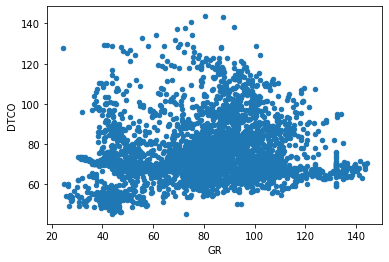

In [4]:
df.plot(x='GR',y='DTCO',kind='scatter')

In [5]:
df['GR_Bins']=pd.qcut(df['GR'],4,labels=['VL','L','M','H'])
g1=df.groupby('GR_Bins')

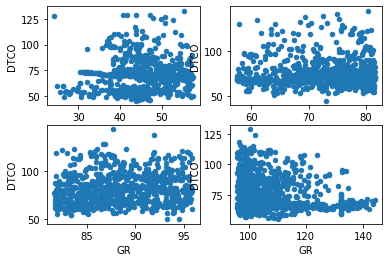

In [6]:
g1.groups.keys()
fig,ax=plt.subplots(2,2)
a=ax.ravel()
count=0
for _,i in g1:
    i.plot(x='GR',y='DTCO',kind='scatter',ax=a[count])
    count+=1
    

In [26]:
gr=df['GR'].values
y=df['DTCO'].values

'''
y=a+bx+cx**2+dx**3
'''

def poly(x,x0,y0,b,c,d):
    return b*x+c*x**2+d*x**3 -(b*x0+c*x0**2+d*x0**3) + y0
    

# def piecewise_sol(X,x0,y0,b0,c0,d0,b1,c1,d1):
#     temp=np.piecewise(X,[X<x0],[ lambda x: b0*x+c0*x**2+d0*x**3 -(b0*x0+c0*x0**2+d0*x0**3) + y0,
#                            lambda x: b1*x+c1*x**2+d1*x**3 -(b1*x0+c1*x0**2+d1*x0**3) + y0
        
#     ])
#     return temp
    
def piecewise_sol(X,x0,y0,b0,c0,d0,b1,c1,d1):
    temp=np.piecewise(X,[X<x0],[ lambda a: poly(a,x0,y0,b0,c0,d0),
                                lambda a: poly(a,x0,y0,b1,c1,d1)  ])
    return temp


In [27]:
df[df.GR.round()==60].mean()
# df.GR.round()
# gr,y

DTCO    75.015115
GR      59.933505
HCAL    10.477573
RHO      2.340742
dtype: float64

In [28]:
piecewise_sol1(gr,50,75,1,1,1,0,0,0)

array([-35559.09689477, -39948.9547637 , -34798.27503708, ...,
           75.        ,     75.        ,     75.        ])

In [29]:
param,err=optimize.curve_fit(piecewise_sol,gr,y)

In [30]:
param

array([ 5.65549155e+01,  7.13351939e+01,  7.00989548e+00, -1.45149731e-01,
        9.96943196e-04,  1.02047075e+00, -3.83154275e-03, -1.13069782e-05])

In [31]:
df.shape

(3105, 5)

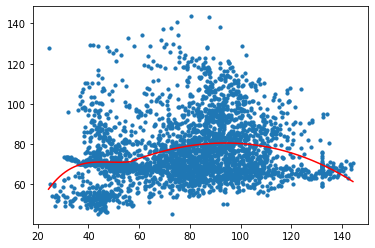

In [32]:
plt.scatter(gr,y,s=10)
tt=np.linspace(df.GR.min(),df.GR.max(),1000)
plt.plot(tt,piecewise_sol(tt,*param),c='r')

# Multiple Conditions

In [37]:
df.GR.quantile([0.25,0.5,0.75,1])

0.25     57.42810
0.50     81.62910
0.75     95.88654
1.00    144.24440
Name: GR, dtype: float64

In [43]:
gr=df.GR.values


In [44]:
cond_lt=[gr<57,(gr>=57) & (gr<95), gr>=95]
ch_list=[gr,gr**2,0]

np.select(cond_lt,ch_list)

array([44.7916 , 44.06131, 44.91579, ...,  0.     ,  0.     ,  0.     ])

In [57]:
def cond_sol(x,a,b,c):
    cond_lt=[x<57,(x>=57) & (x<95), x>=95]
    ch_list=[x**a,x**b,x**c]
    
    temp=np.select(cond_lt,ch_list)
    return temp

In [59]:
len(cond_sol(gr,1,2,3)),len(gr)
cond_sol(gr,1,2,3)

array([4.4791600e+01, 4.4061310e+01, 4.4915790e+01, ..., 2.3098668e+06,
       2.3098668e+06, 2.3098668e+06])

In [60]:
param,err=optimize.curve_fit(cond_sol,gr,y)

In [61]:
len(cond_sol(tt,*param))

1000

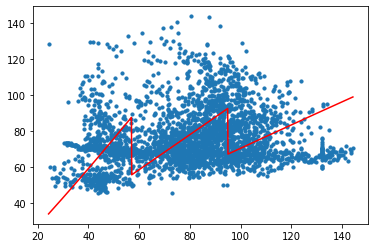

In [62]:
plt.scatter(gr,y,s=10)
tt=np.linspace(df.GR.min(),df.GR.max(),1000)
plt.plot(tt,cond_sol(tt,*param),c='r')

In [74]:
np.array(2)**3

8

In [88]:
def pl_cur(x,n):
    return x**n +x**(n-1)+ x**(n-2)
    

def cond_sol1(x,a,b,c,A=57,B=90):
    cond_lt=[x<57,(x>=57) & (x<90), x>=90]
    ch_list=[pl_cur(x,a),pl_cur(x,b),pl_cur(x,c)]
    
    temp=np.select(cond_lt,ch_list)
    return temp

/srv/conda/envs/notebook/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


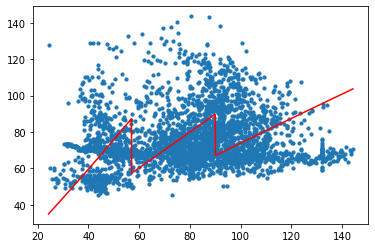

In [89]:
param,err=optimize.curve_fit(cond_sol1,gr,y)

plt.scatter(gr,y,s=10)
tt=np.linspace(df.GR.min(),df.GR.max(),1000)
plt.plot(tt,cond_sol1(tt,*param),c='r')

In [90]:
param

array([1.10099707, 0.99688233, 0.93208861, 1.        , 1.        ])